In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

# Step 1 - Load the Data

In [28]:
flights = pd.read_csv('flights_train.csv', index_col=0, parse_dates=True)
flights.head()

,passengers
date,
1949-01-01,64
1949-02-01,75
1949-03-01,98
1949-04-01,93
1949-05-01,80


In [29]:
# Inspect the size of the data
flights.shape # 11 years of monthly data

(132, 1)

In [30]:
# Inspect the column types
flights['passengers'].dtype

dtype('int64')

In [31]:
# Inspect for missing values
flights.isna().sum()

passengers    0
dtype: int64

# Step 2 - Plot the data

<AxesSubplot:xlabel='date'>

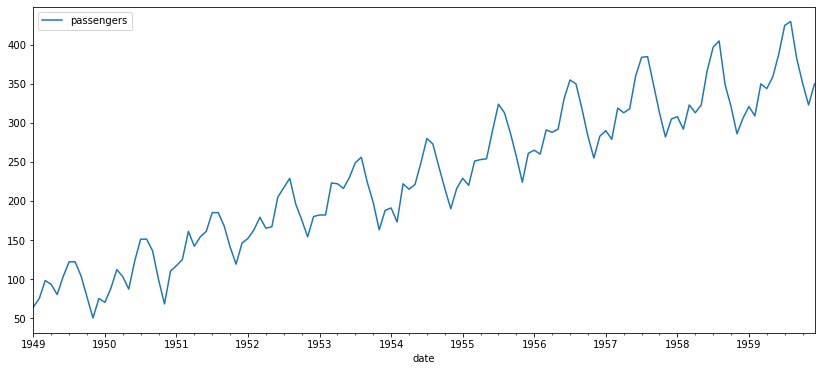

In [32]:
flights.plot()

# Step 3 - Model the trend

Any ideas on how to do that?

- Linear Regression to model the slop; what should/could our X of the Linear Regression be in that case?

In [33]:
# Create a yearly column for the trend
flights['year'] = flights.index.year
flights.head()

,passengers,year
date,,
1949-01-01,64,1949
1949-02-01,75,1949
1949-03-01,98,1949
1949-04-01,93,1949
1949-05-01,80,1949


In [34]:
# Create a monthly column for the trend
flights['month'] = flights.index.month
flights.head()

,passengers,year,month
date,,,
1949-01-01,64,1949,1
1949-02-01,75,1949,2
1949-03-01,98,1949,3
1949-04-01,93,1949,4
1949-05-01,80,1949,5


In [35]:
# Create a timestep variable
flights['timestep'] = list(range(len(flights)))
flights.head()

,passengers,year,month,timestep
date,,,,
1949-01-01,64,1949,1,0
1949-02-01,75,1949,2,1
1949-03-01,98,1949,3,2
1949-04-01,93,1949,4,3
1949-05-01,80,1949,5,4


In [36]:
# Run a Linear Regression
m = LinearRegression()
X = flights[['timestep']]
y = flights['passengers']
m.fit(X, y)

LinearRegression()

# Step 4 - Plot the trend and the original data

In [37]:
# Use the model to make a prediction
flights['trend'] = m.predict(X)
flights.head()

,passengers,year,month,timestep,trend
date,,,,,
1949-01-01,64,1949,1,0,79.444293
1949-02-01,75,1949,2,1,81.761937
1949-03-01,98,1949,3,2,84.079581
1949-04-01,93,1949,4,3,86.397226
1949-05-01,80,1949,5,4,88.714870


<AxesSubplot:xlabel='date'>

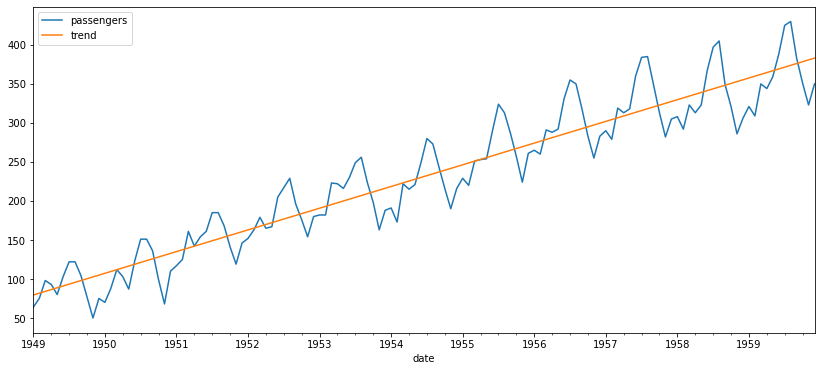

In [38]:
flights[['passengers', 'trend']].plot()

# Step 5 - Model the seasonality

In [39]:
pd.get_dummies(flights.index.month, prefix='month').set_index(flights.index)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
1949-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,0,0,0,0,0,0,0,1,0,0,0,0
1959-09-01,0,0,0,0,0,0,0,0,1,0,0,0
1959-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(flights.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(flights.index)
# sklearn.preprocessing.OneHotEncoder

flights = flights.join(seasonal_dummies)

In [41]:
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,
1949-01-01,64,1949,1,0,79.444293,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0


In [42]:
# Define X and y
X = flights.drop(columns=['passengers', 'year', 'month', 'trend'])

In [43]:
X

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,1,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,2,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,3,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-08-01,127,0,0,0,0,0,0,1,0,0,0,0
1959-09-01,128,0,0,0,0,0,0,0,1,0,0,0
1959-10-01,129,0,0,0,0,0,0,0,0,1,0,0


In [44]:
m.fit(X, y)

LinearRegression()

In [45]:
# Create a model with trend and seasonality
flights['trend_seasonal'] = m.predict(X)
flights.head()

,passengers,year,month,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
date,,,,,,,,,,,,,,,,,
1949-01-01,64,1949,1,0,79.444293,0,0,0,0,0,0,0,0,0,0,0,59.594697
1949-02-01,75,1949,2,1,81.761937,1,0,0,0,0,0,0,0,0,0,0,57.503788
1949-03-01,98,1949,3,2,84.079581,0,1,0,0,0,0,0,0,0,0,0,90.503788
1949-04-01,93,1949,4,3,86.397226,0,0,1,0,0,0,0,0,0,0,0,83.412879
1949-05-01,80,1949,5,4,88.714870,0,0,0,1,0,0,0,0,0,0,0,85.231061


# Step 6 - Plot the original data and the trend

<AxesSubplot:xlabel='date'>

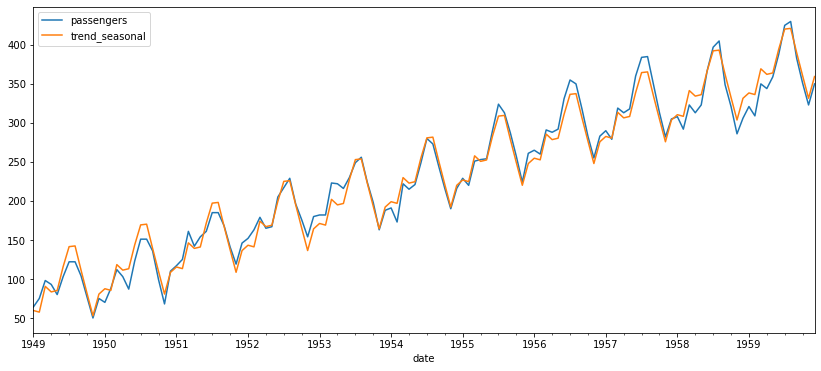

In [46]:
flights[['passengers', 'trend_seasonal']].plot()

# Step 7 - Extract the remainder

In [28]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
flights['remainder'] = flights['passengers'] - flights['trend_seasonal']

<AxesSubplot:xlabel='date'>

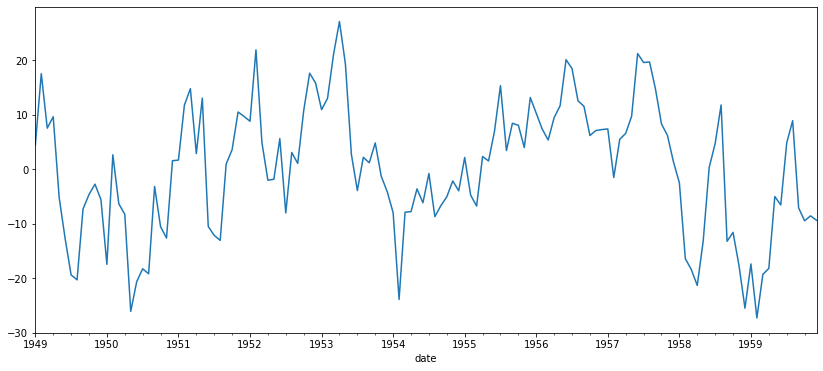

In [29]:
flights['remainder'].plot()

In [30]:
import numpy as np

# Step 8 - Save the remainder

In [31]:
flights['remainder'].to_csv('flights_remainder.csv')

# Tasks for the afternoon

- Finish loading, cleaning and splitting the temperature data
- Run through the same exercise for the temperature data